# VOLATILITY CLUSTERING - GARCH(1, 1) model

This Jupyter Notebook contains main functions git GARCH model to data to visualize alpha diversity volatility

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import scipy.stats as stats
import matplotlib as mpl
import arch
from arch import arch_model

In [3]:
sns.set_style('white')

In [4]:
def fit_arch_model(df, subject):
    
    df['returns'] = df.pct_change(1)*100

    returns = df['returns'][1:]
    model = arch_model(returns, 
                         vol='GARCH',
                         mean='zero', lags = [1],
                         p=1, 
                         q=1).fit(update_freq=20)
    volatility = model.conditional_volatility.dropna().values.ravel()
    estimated_mean = model.forecast(start=1, horizon=1).mean.values

    #gte conditional volatility
    volatility = model.conditional_volatility#.dropna().values.ravel()
    estimated_mean = model.forecast(horizon=1).mean.values
    volatility_df = pd.DataFrame(volatility.dropna().values.ravel(), columns = ['conditional_volatility'])
    volatility_df['conditional_volatility_2'] = np.sqrt(volatility_df['conditional_volatility'])
    volatility_df['subject'] = subject
    
    return volatility_df

# I. Shannon diversity index

In [5]:
wd =  './data/alpha_diversity/shannon/'

male_alpha_df = pd.read_csv(wd + 'male_shannon_entropy.csv')
female_alpha_df = pd.read_csv(wd + 'female_shannon_entropy.csv')
donorA_alpha_df = pd.read_csv(wd + 'donorA_shannon_entropy.csv')
donorB_alpha_df = pd.read_csv(wd + 'donorB_shannon_entropy.csv')

male_conditional_volatility = fit_arch_model(male_alpha_df, 'male')
female_conditional_volatility = fit_arch_model(female_alpha_df, 'female')
donorA_conditional_volatility = fit_arch_model(donorA_alpha_df, 'donorA')
donorB_conditional_volatility = fit_arch_model(donorB_alpha_df, 'donorB')

datasets = [male_conditional_volatility, female_conditional_volatility, donorA_conditional_volatility, donorB_conditional_volatility]

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1800.2519628966638
            Iterations: 15
            Function evaluations: 64
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 661.266666097449
            Iterations: 12
            Function evaluations: 51
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1206.4573537826027
            Iterations: 10
            Function evaluations: 43
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 927.7147529278004
            Iterations: 8
            Function evaluations: 34
            Gradient evaluations: 8


/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for rein

### plot vlatility

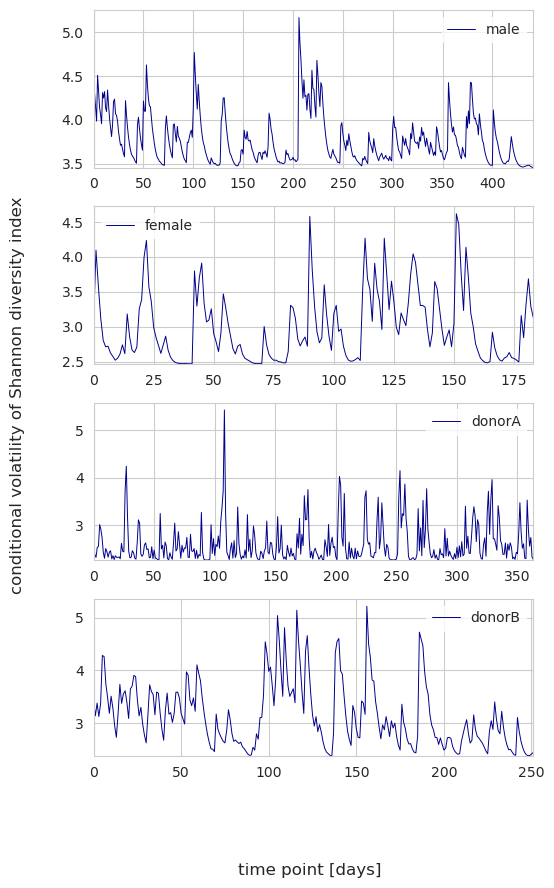

In [8]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(4, 1, figsize = (5, 8))

for dataset, i in zip(datasets, range(0, 4)):
    
    axes[i].plot(dataset['conditional_volatility_2'], '-', color='darkblue', lw=.7, label = dataset['subject'].iloc[0])
    axes[i].set_xlim([min(dataset.index), max(dataset.index)])
    axes[i].set_ylim(min(dataset.conditional_volatility_2))
    axes[i].legend(edgecolor='w')
    
fig.text(0.5, -0.1, 'time point [days]', ha='center', fontsize=12)
fig.text(-0.1, 0.5, 'conditional volatility of Shannon diversity index', va='center', rotation='vertical', fontsize=12)
fig.subplots_adjust(bottom=0.5)
plt.tight_layout()

# II. Faith's PD index

In [9]:
wd =  './data/alpha_diversity/faiths_pd/'

male_alpha_df = pd.read_csv(wd + 'male_faiths_pd.csv')
female_alpha_df = pd.read_csv(wd + 'female_faiths_pd.tsv', sep = '\t', index_col = [0])
donorA_alpha_df = pd.read_csv(wd + 'donorA_faiths_pd.tsv', sep = '\t', index_col = [0])
donorB_alpha_df = pd.read_csv(wd + 'donorB_faiths_pd.tsv', sep = '\t', index_col = [0])


male_conditional_volatility = fit_arch_model(male_alpha_df, 'male')
female_conditional_volatility = fit_arch_model(female_alpha_df, 'female')
donorA_conditional_volatility = fit_arch_model(donorA_alpha_df, 'donorA')
donorB_conditional_volatility = fit_arch_model(donorB_alpha_df, 'donorB')

datasets = [male_conditional_volatility, female_conditional_volatility, donorA_conditional_volatility, donorB_conditional_volatility]

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1898.6832843524053
            Iterations: 13
            Function evaluations: 56
            Gradient evaluations: 13
Iteration:     20,   Func. Count:     81,   Neg. LLF: 782.7458141215642
Optimization terminated successfully    (Exit mode 0)
            Current function value: 782.7458141216403
            Iterations: 20
            Function evaluations: 81
            Gradient evaluations: 20
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1612.3923045705847
            Iterations: 9
            Function evaluations: 33
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1030.6626714706192
            Iterations: 12
            Function evaluations: 49
            Gradient evaluations: 12


/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for rein

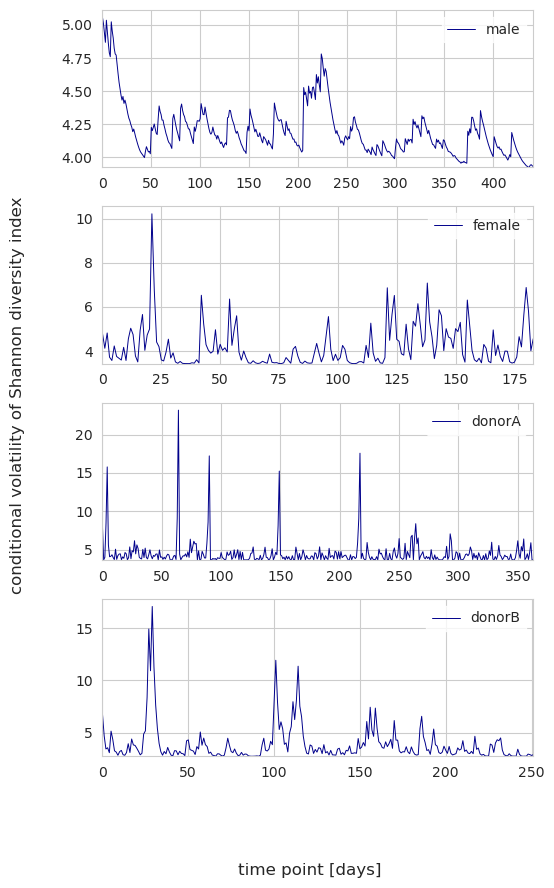

In [10]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(4, 1, figsize = (5, 8))

for dataset, i in zip(datasets, range(0, 4)):
    
    axes[i].plot(dataset['conditional_volatility_2'], '-', color='darkblue', lw=.7, label = dataset['subject'].iloc[0])
    axes[i].set_xlim([min(dataset.index), max(dataset.index)])
    axes[i].set_ylim(min(dataset.conditional_volatility_2))
    axes[i].legend(edgecolor='w')
    
fig.text(0.5, -0.1, 'time point [days]', ha='center', fontsize=12)
fig.text(-0.1, 0.5, 'conditional volatility of Shannon diversity index', va='center', rotation='vertical', fontsize=12)

fig.subplots_adjust(bottom=0.5)
fig.tight_layout()